<a href="https://colab.research.google.com/github/casjunior93/demoday-tera-previsao-de-retorno-de-adsense/blob/main/C%C3%B3pia_de_Projeto_Tera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que iremos testar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1. Abordar o problema e analisar o panorama em geral
2. Obter os dados
3. Explorar os dados para obter informações úteis
4. Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5. Explorar modelos diferentes e selecionar os melhores.
6. Aperfeiçoar os modelos e os combinar em uma solução ideal.
7. Apresentar a solução.
8. Implementar, monitorar e fazer a manutenção de seu sistema.

# 1: Abordar o problema e analisar o panorama em geral

**Objetivo:** Criar um modelo de previsão para monetização e pagamentos de influenciadores digitais.

**Público alvo:** Gestores de Redes Multicanal (MCNs) de criadores do YouTube. 

**Problema do usuário:** Não existe hoje nenhum modelo de previsão para que gestores de redes multicanal (MCNs) consigam realizar de maneira eficiente a previsão de pagamentos de valores recebidos pela plataforma de monetização do YouTube para canais afiliados e YouTube Creators.

**Solução:** Criarmos um modelo de análise para prever o retorno de Adsense baseado no histórico do influenciador.



# 2: Obter os dados

In [ ]:
# Carregando os dados para treinamento do modelo
dados = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/Dados do gráfico - Dados do gráfico (1).csv',sep=',')
dados1 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/Dados do gráfico - Dados do gráfico (2).csv',sep=',')
dados2 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/Dados do gráfico - Dados do gráfico (3).csv',sep=',')
dados3 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/Dados do gráfico - Dados do gráfico (4).csv',sep=',')
dados4 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/Dados do gráfico - Dados do gráfico.csv',sep=',')
receita = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/receita.csv',sep=',')
receita_est_adsense = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/receita-est-adsense.csv',sep=',')

# 3: Explorar os dados para obter informações úteis

## 3.1 Porcentagem visualizada média (%)

### 3.1.1 Agrupando dados por mês

In [ ]:
dados.head(2)

,Data,Canal,Título do canal,Porcentagem visualizada média (%),mes_ano
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306


In [ ]:
dados['Data'] = dados['Data'].astype('datetime64')

In [ ]:
dados['mes_ano'] = dados['Data'].map(lambda x: 100*x.year + x.month)

In [ ]:
dados.head(2)

,Data,Canal,Título do canal,Porcentagem visualizada média (%),mes_ano
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306


In [ ]:
porcentagem_visualizada = dados[['mes_ano', 'Porcentagem visualizada média (%)']]
porcentagem_visualizada.head()

,mes_ano,Porcentagem visualizada média (%)
0,201306,0.00
1,201306,0.00
2,201306,0.00
3,201306,0.00
4,201306,0.00


In [ ]:
porcentagem_visualizada = porcentagem_visualizada.groupby(['mes_ano']).mean().reset_index()
porcentagem_visualizada.head(2)

,mes_ano,Porcentagem visualizada média (%)
0,201306,5.17
1,201307,14.21


In [ ]:
def add_hifen_data(df):
  '''Adiciona um hífen no data'''
  data = str(int(df['mes_ano']))
  return data[:4] + '-' + data[4:]

In [ ]:
porcentagem_visualizada['mes_ano'] = porcentagem_visualizada.apply(add_hifen_data, axis=1)

In [ ]:
porcentagem_visualizada.head(10)

,mes_ano,Porcentagem visualizada média (%)
0,2013-06,5.17
1,2013-07,14.21
2,2013-08,14.81
3,2013-09,14.24
4,2013-10,14.07
5,2013-11,14.07
6,2013-12,13.76
7,2014-01,14.02
8,2014-02,13.88
9,2014-03,13.71


### 3.1.2 Visualização dos dados

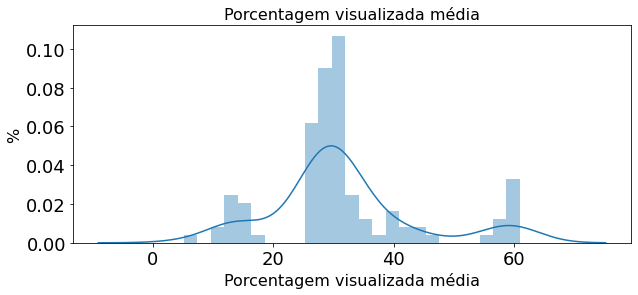

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(porcentagem_visualizada['Porcentagem visualizada média (%)'])
plt.xlabel('Porcentagem visualizada média',size=16)
plt.ylabel('%',size=16)
plt.title('Porcentagem visualizada média',size=16)
plt.show()

## 3.2 Inscritos

### 3.2.1 Agrupando dados por mês

In [ ]:
dados1.head(10)

,Data,Canal,Título do canal,Inscritos
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


In [ ]:
dados1['Data'] = dados1['Data'].astype('datetime64')

In [ ]:
dados1['mes_ano'] = dados1['Data'].map(lambda x: 100*x.year + x.month)

In [ ]:
inscritos = dados1[['mes_ano', 'Inscritos']]
inscritos.head()

,mes_ano,Inscritos
0,201306,0
1,201306,0
2,201306,0
3,201306,0
4,201306,0


In [ ]:
inscritos = inscritos.groupby(['mes_ano']).sum().reset_index()
inscritos.head(2)

,mes_ano,Inscritos
0,201306,611
1,201307,1460


In [ ]:
inscritos['mes_ano'] = inscritos.apply(add_hifen_data, axis=1)

In [ ]:
inscritos.head(2)

,mes_ano,Inscritos
0,2013-06,611
1,2013-07,1460


### 3.2.2 Visualização dos dados

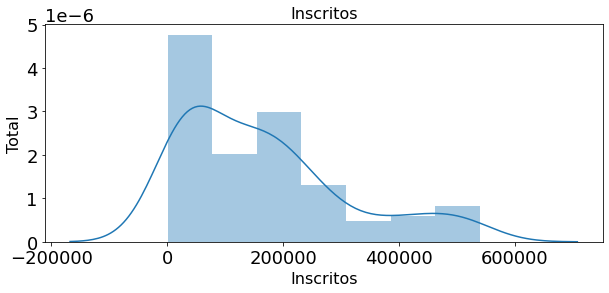

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(inscritos['Inscritos'])
plt.xlabel('Inscritos',size=16)
plt.ylabel('Total',size=16)
plt.title('Inscritos',size=16)
plt.show()

## 3.3 Vídeos publicados

### 3.3.1 Agrupando dados por mês

In [ ]:
dados2.head(10)

,Data,Canal,Título do canal,Vídeos publicados
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


In [ ]:
dados2['Data'] = dados2['Data'].astype('datetime64')

In [ ]:
dados2['mes_ano'] = dados2['Data'].map(lambda x: 100*x.year + x.month)

In [ ]:
dados2.head(2)

,Data,Canal,Título do canal,Vídeos publicados,mes_ano
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0,201306
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0,201306


In [ ]:
videos = dados2[['mes_ano', 'Vídeos publicados']]
videos.head()

,mes_ano,Vídeos publicados
0,201306,0
1,201306,0
2,201306,0
3,201306,0
4,201306,0


In [ ]:
videos = videos.groupby(['mes_ano']).sum().reset_index()
videos.head(2)

,mes_ano,Vídeos publicados
0,201306,0
1,201307,0


In [ ]:
videos['mes_ano'] = videos.apply(add_hifen_data, axis=1)

In [ ]:
videos.head(10)

,mes_ano,Vídeos publicados
0,2013-06,0
1,2013-07,0
2,2013-08,0
3,2013-09,0
4,2013-10,4
5,2013-11,21
6,2013-12,20
7,2014-01,17
8,2014-02,16
9,2014-03,21


### 3.3.2 Visualização dos dados

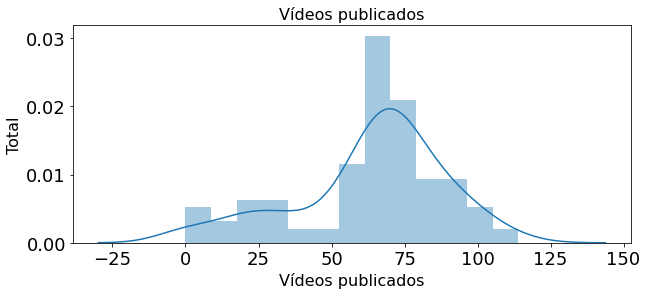

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(videos['Vídeos publicados'])
plt.xlabel('Vídeos publicados',size=16)
plt.ylabel('Total',size=16)
plt.title('Vídeos publicados',size=16)
plt.show()

## 3.4 Visualizações

### 3.4.1 Agrupando dados por mês

In [ ]:
dados3.head(10)

,Data,Canal,Título do canal,Visualizações
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


In [ ]:
dados3['Data'] = dados3['Data'].astype('datetime64')

In [ ]:
dados3['mes_ano'] = dados3['Data'].map(lambda x: 100*x.year + x.month)

In [ ]:
dados3.head(2)

,Data,Canal,Título do canal,Visualizações,mes_ano
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0,201306
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0,201306


In [ ]:
visualizacoes = dados3[['mes_ano', 'Visualizações']]
visualizacoes.head()

,mes_ano,Visualizações
0,201306,0
1,201306,0
2,201306,0
3,201306,0
4,201306,0


In [ ]:
visualizacoes = visualizacoes.groupby(['mes_ano']).sum().reset_index()
visualizacoes.head(2)

,mes_ano,Visualizações
0,201306,111837
1,201307,270185


In [ ]:
visualizacoes['mes_ano'] = visualizacoes.apply(add_hifen_data, axis=1)

In [ ]:
visualizacoes.head(10)

,mes_ano,Visualizações
0,2013-06,111837
1,2013-07,270185
2,2013-08,2310890
3,2013-09,1318473
4,2013-10,2993517
5,2013-11,2794701
6,2013-12,2678841
7,2014-01,1339282
8,2014-02,1892473
9,2014-03,1599545


### 3.4.2 Visualização dos dados

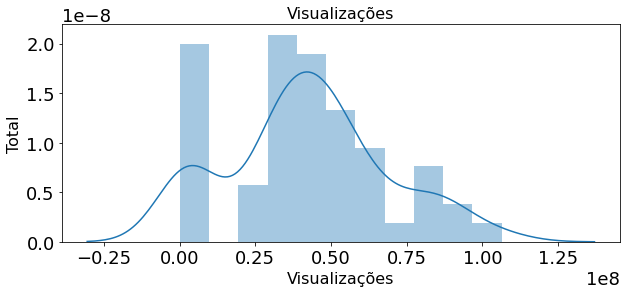

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(visualizacoes['Visualizações'])
plt.xlabel('Visualizações',size=16)
plt.ylabel('Total',size=16)
plt.title('Visualizações',size=16)
plt.show()

## 3.5 Receita

### 3.5.1 Agrupando dados por mês

In [ ]:
receita.head(10)

,Data,Canal,Título do canal,Sua receita estimada (USD)
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


In [ ]:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16475 entries, 0 to 16474
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Data                        16475 non-null  object
 1   Canal                       16475 non-null  object
 2   Título do canal             16475 non-null  object
 3   Sua receita estimada (USD)  16475 non-null  object
dtypes: object(4)
memory usage: 515.0+ KB


In [ ]:
def substitui_virgula(df):
  ''' Substitui virgula por ponto'''
  valor = df['Sua receita estimada (USD)']
  return valor.replace(",", ".")

In [ ]:
receita['Sua receita estimada (USD)'] = receita.apply(substitui_virgula, axis=1)

In [ ]:
receita['Sua receita estimada (USD)'] = receita['Sua receita estimada (USD)'].astype('float')

In [ ]:
receita['Data'] = receita['Data'].astype('datetime64')

In [ ]:
receita['mes_ano'] = receita['Data'].map(lambda x: 100*x.year + x.month)

In [ ]:
receita.head(2)

,Data,Canal,Título do canal,Sua receita estimada (USD),mes_ano
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00,201306


In [ ]:
dreceita = receita[['mes_ano', 'Sua receita estimada (USD)']]
dreceita.head()

,mes_ano,Sua receita estimada (USD)
0,201306,0.00
1,201306,0.00
2,201306,0.00
3,201306,0.00
4,201306,0.00


In [ ]:
dreceita = dreceita.groupby(['mes_ano']).sum().reset_index()
dreceita.head(2)

,mes_ano,Sua receita estimada (USD)
0,201306,18.28
1,201307,95.71


In [ ]:
dreceita['mes_ano'] = dreceita.apply(add_hifen_data, axis=1)

In [ ]:
dreceita.head(10)

,mes_ano,Sua receita estimada (USD)
0,2013-06,18.28
1,2013-07,95.71
2,2013-08,1492.12
3,2013-09,811.47
4,2013-10,3129.77
5,2013-11,6081.69
6,2013-12,8613.10
7,2014-01,5015.95
8,2014-02,4668.98
9,2014-03,4129.88


### 3.4.2 Visualização dos dados

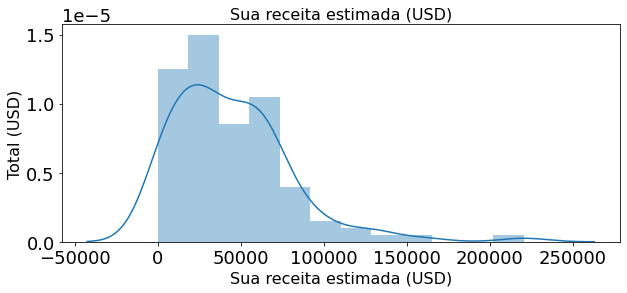

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(dreceita['Sua receita estimada (USD)'])
plt.xlabel('Sua receita estimada (USD)',size=16)
plt.ylabel('Total (USD)',size=16)
plt.title('Sua receita estimada (USD)',size=16)
plt.show()